In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("plotdata/eval_results.csv")

In [ ]:
columns_to_drop = ['Timestamp', 'If you agree, write a short answer..1', 'If you agree, write a short answer.', 'Have you taken any formal courses or received any training in machine learning?',
       'Have you worked on any machine learning projects, either personally or professionally?',
       'Are you familiar with the concept of Explainable Artificial Intelligence (XAI)?','Have you used or worked with any tools or techniques related to explainable AI?']
df = df.drop(columns=columns_to_drop)

# mapping = {"Strongly agree": 1, "Somewhat agree": 1, "Neither agree nor disagree": 0, "Somewhat disagree": 0, "Disagree": 0}
# mapping1 = {"Very effective": 1, "Effective": 1, "Neutral": 0, "Ineffective": 0, "Very ineffective": 0}
# mapping2 = {"Highly relevant": 1, "Relevant": 1, "Neutral": 0, "Irrelevant": 0, "Highly irrelevant": 0}
# mapping3 = {"Significantly enhanced": 1, "Enhanced": 1, "Neutral": 0, "Limited enhancement": 0, "No enhancement": 0}
# mapping4 = {"Yes": 1,"No": 0}
# mapping5 = {"Expert": "Advanced","Beginner":"Intermediate"}
# df = df.applymap(lambda x: mapping.get(x, x))
# df = df.applymap(lambda x: mapping1.get(x, x))
# df = df.applymap(lambda x: mapping2.get(x, x))
# df = df.applymap(lambda x: mapping3.get(x, x))
# df = df.applymap(lambda x: mapping4.get(x, x))
# df = df.applymap(lambda x: mapping5.get(x, x))

new_column_names = {'What is you level of familiarity with machine learning concepts?': 'level',
                    "1. The explanation provided helped to understand the model's prediction. To what extent do you agree?": 'mm1',
                    "1. The explanation provided helped to understand the model's prediction. To what extent do you agree?.1": 'mm2',
                    "1. The explanation provided helped to understand the model's prediction. To what extent do you agree?.2": 'mm3',
                    "2. The explanation is clear and easy to comprehend. To what extent do you agree?":'clr1',
                    "2. Explanation is clear and easy to comprehend. To what extent do you agree?":'clr2',
                    "2. The explanation is clear and easy to comprehend. To what extent do you agree?.1":'clr3',
                    "3. The group \"Support\" enhances the understanding of the model's prediction. To what extent do you agree?":"sup1",
                    "4. The group \"Support\" enhances the understanding of the model's prediction. To what extent do you agree?":"sup2",
                    "4. The group \"Support\" enhances the understanding of the model's prediction. To what extent do you agree?.1":"sup3",
                    "3. The group \"Support by Contrast\" enhances the understanding of the model's prediction. To what extent do you agree?":"supc1",
                    "5. The group \"Support by Contrast\" enhances the understanding of the model's prediction. To what extent do you agree?":"supc2",
                    "6. The group \"Oppose\" enhances the understanding of the model's prediction. To what extent do you agree?": "op2",
                    "5. The group \"Oppose\" enhances the understanding of the model's prediction. To what extent do you agree?": "op3",
                    "7. The group \"Oppose by Contrast\" enhances the understanding of the model's prediction. To what extent do you agree?": "opc2",
                    "8. The explanation helped me understand how the model's performance can be improved?":"haic2",
                    "6. The explanation helped me understand how the model's performance can be improved?":"haic3",
                    '2. To what extent did you find the provided samples relevant to the specific intent you encountered, i.e., interpreting a correct prediction, investigating a wrong prediction, clarifying an ambiguous one?': 'intent',
                    '3. Do you believe that the use of contrast in the groups of images shown enhanced your understanding of the model predictions?': 'contrastivity',
                    '1. Considering the use cases and explanations provided, how would you rate the overall effectiveness of AIDE in helping to understand model predictions? ':'effectiveness'}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df.head(4)

In [ ]:
df["level"].value_counts()

In [ ]:
a = pd.concat([df["level"], df["level"]], ignore_index=True)

concatenated = pd.concat([df["op2"], df["op3"]], ignore_index=True)
new_df = pd.DataFrame({'a': a, 'Support': concatenated})
new_df.groupby("a").value_counts()

In [ ]:
# Mental Model
df.groupby("level")["mm2"].value_counts(1)

In [ ]:
# Clarity of Explanation
df.groupby("level")["clr1"].value_counts(1)

In [ ]:
# Human-AI Collaboration
df.groupby("level")["haic2"].value_counts(1)

In [ ]:
# Helpfulness
df.groupby("level")["intent"].value_counts(1)

In [ ]:
# Contrativity Usefulness
df.groupby("level")["contrastivity"].value_counts(1)

In [ ]:
# Overall Effectiveness
df.groupby("level")["effectiveness"].value_counts(1)

# Faithfulness comparison for AIDE, IF, and RelatIF

In [1]:
import numpy as np
from scipy.stats import pearsonr

In [2]:
aide_data = np.load('plotdata/plot_spam.npz', allow_pickle=True)
if_data = np.load('plotdata/plot_spam_inf.npz', allow_pickle=True)
rel_data = np.load('plotdata/plot_spam_rel.npz', allow_pickle=True)

In [3]:
def flatten_sum(matrix):
    return sum(matrix, [])

In [1]:
# aide_data['fuzzy']

In [18]:
ar=np.sort(aide_data['fuzzy'].flatten())

In [11]:
ar=np.sort(rel_data['fuzzy'].flatten())

In [17]:
ar=np.sort(flatten_sum(aide_data['cosine']))

ValueError: operands could not be broadcast together with shapes (0,) (20,) 

In [19]:
ar.shape

(2000,)

In [21]:
ar[:1000].sum()/1000

0.5350481277107766

In [21]:
if_data['fuzzy'].flatten().shape

(2000,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Correlation AIDE: 0.9101885012112415
Correlation IF: 0.7979627719818707
Correlation RelatIF: 0.913913083638193


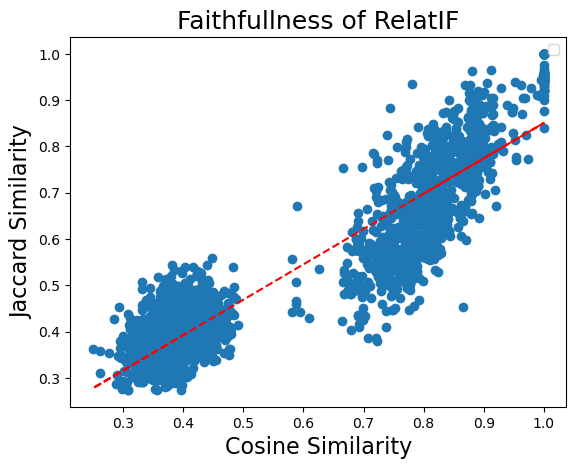

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Generate example data for three methods
np.random.seed(42)

# Example data for Aide
method1_jaccard_scores = aide_data['fuzzy'].flatten()
method1_cosine_scores = aide_data['cosine'].flatten()

# # Example data for if
method2_jaccard_scores = if_data['fuzzy'].flatten()
method2_cosine_scores = if_data['cosine'].flatten()

# Example data for relatif
method3_jaccard_scores = rel_data['fuzzy'].flatten()
method3_cosine_scores = rel_data['cosine'].flatten()

# Compute correlation coefficients for each method
correlation_method1, _ = pearsonr(method1_cosine_scores, method1_jaccard_scores)
correlation_method2, _ = pearsonr(method2_jaccard_scores, method2_cosine_scores)
correlation_method3, _ = pearsonr(method3_jaccard_scores, method3_cosine_scores)

# Print correlation coefficients
print("Correlation AIDE:", correlation_method1)
print("Correlation IF:", correlation_method2)
print("Correlation RelatIF:", correlation_method3)

# Visualization: Scatter plot with regression line for Method 1
plt.scatter(method3_cosine_scores, method3_jaccard_scores)
plt.title("Faithfullness of RelatIF", fontsize=18)
plt.ylabel("Jaccard Similarity", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=16)

# Add regression line
z3 = np.polyfit(method3_cosine_scores, method3_jaccard_scores, 1)
p3 = np.poly1d(z3)
plt.plot(method3_cosine_scores, p3(method3_cosine_scores), "r--")
plt.legend()
plt.savefig('rel_spam_faith.eps', format='eps')
plt.show()


In [73]:
correlation_method1, _ = pearsonr(method1_cosine_scores[:400], method1_jaccard_scores[:400])
correlation_method2, _ = pearsonr(method2_jaccard_scores[:400], method2_cosine_scores[:400])
correlation_method3, _ = pearsonr(method3_jaccard_scores[:400], method3_cosine_scores[:400])

# Print correlation coefficients
print("Correlation AIDE:", correlation_method1)
print("Correlation IF:", correlation_method2)
print("Correlation RelatIF:", correlation_method3)

Correlation AIDE: 0.905277759917249
Correlation IF: 0.8480369409081974
Correlation RelatIF: 0.9005464457496883
